# Project: Investigate a Dataset - TMDB Movie Data Analysis

#### BY FABI DANIEL


<a id='intro'></a>
# Introduction

### Dataset Description 

> I am using the TMDB movie data. Originally, the dataset contains 10866 rows and 21 columns. I assessed and treated missing values, incorrect and impossible values especially in the budget and revenue columns. 

In summary, the dataset contains information about the production team (cast & Directors) and company, the financial records of each film and the ratings. 

### Question(s) for Analysis

> 1. Top 25 directors with highest profits? 
    The idea is to determine 25 directors that have made the most profits. A profit column is created, which is the difference between the revenue and budgets then this grouped by the Director Column to arrive at the total profits for each director, the top 25 is returned. This could be improved by adding another variable(count) to the mix, the ratio.
> 2. Top 25 Directors with highest success ratio? 
    The first question revealed half truth, prolific directors will definitely have more profits due to the number of films. This shows the director with the highest profits per film. 
> 3. Over the years, whose film has been more popular, James or Steven?
    Special focus was on Two Iconic Directors, **Steven Spielberg(Jaws, E.T)** and **James Cameroon(Avatar, Titanic)**. 


Note: Special focus will be on two directors and how they rank based on the above questions; Steven Spielberg & James Cameron. 
    

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


<a id='wrangling'></a>
# Data Wrangling

> Observations include: 
    > 1. Missing Values
    > 2. Incorrect Values in budget & Revenue Columns


##### General Properties

In [4]:
# Load your dataset


df = pd.read_csv('/Users/mac/Documents/GitHub/Investigate-Dataset/tmdb-movies.csv')
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
# Get an overview of the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Get summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the infor that we have **10866 entries and 21 columns**. Some columns are surplus to this analysis and we can also confirm the presence of missing values. These will be addressed in the following chapter


### Data Cleaning

 

##### Remove Unneccessary Columns

In [7]:
# Drop columns that are unneccessary to this analysis

df.drop(['homepage','tagline', 'imdb_id','keywords','genres','budget_adj', 'revenue_adj', 'cast', 'production_companies', 'overview'], axis=1, inplace=True)
df.head(10)

,id,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,141,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,94,6/9/15,3935,8.0,2015


Great! Ten surplus columns were dropped. Our dataset is becoming cleaner, next is to **treat nulls and drop duplicates**

##### Treat Null Values 

In [8]:
# Count all Null Values

df.isna().sum().sum()

44

In [9]:
# Check for null elements along the columns
# This shows the total number of unique rows with at lease a null element
df.isnull().any(axis=1).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


There are 44 null values which is insignificant compared to the total dataset. Dropping Null Values is Advised

In [10]:
# % of rows with missing values is low  when compared to the whole dataset
# Deleting Rows is advisable

df.dropna(axis=0, inplace=True, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10822 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10822 non-null  int64  
 1   popularity      10822 non-null  float64
 2   budget          10822 non-null  int64  
 3   revenue         10822 non-null  int64  
 4   original_title  10822 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10822 non-null  int64  
 7   release_date    10822 non-null  object 
 8   vote_count      10822 non-null  int64  
 9   vote_average    10822 non-null  float64
 10  release_year    10822 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1014.6+ KB


I have successfully dropped all null values, however, some rows in the budget and revenue columns have Zero as value. These are impossible values, replacing with values might do harm to our results than good. Dropping them also is advisable.

In [11]:
# Drop rows with budget==0

df_bud_zero = df[df['budget'] == 0]
df.drop(df_bud_zero.index, inplace = True)

# Drop rows with revenue==0
df_rev_zero = df[df['revenue'] == 0]
df.drop(df_rev_zero.index, inplace = True)
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   int64  
 3   revenue         3854 non-null   int64  
 4   original_title  3854 non-null   object 
 5   director        3854 non-null   object 
 6   runtime         3854 non-null   int64  
 7   release_date    3854 non-null   object 
 8   vote_count      3854 non-null   int64  
 9   vote_average    3854 non-null   float64
 10  release_year    3854 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 361.3+ KB


##### Remove Duplicates

In [12]:
# Check for duplicates

df.duplicated().sum()

1

In [13]:
# Drop duplicates
df.drop_duplicates(inplace=True)

##### Change datetime 

In [14]:
# Check dtype of release_date

df['release_date'].dtypes

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3853 non-null   int64         
 1   popularity      3853 non-null   float64       
 2   budget          3853 non-null   int64         
 3   revenue         3853 non-null   int64         
 4   original_title  3853 non-null   object        
 5   director        3853 non-null   object        
 6   runtime         3853 non-null   int64         
 7   release_date    3853 non-null   datetime64[ns]
 8   vote_count      3853 non-null   int64         
 9   vote_average    3853 non-null   float64       
 10  release_year    3853 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 361.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: Who are the Top 25 Directors with highest Profits?

In [15]:
# Create another column to determine profit

df['profit'] = df['revenue'] - df['budget']

# Test code: for the new profit column
df['profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

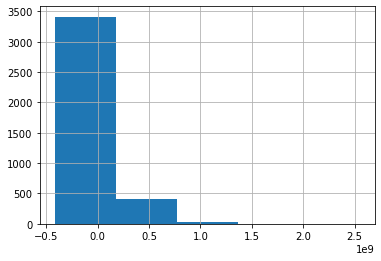

In [16]:
# Let's Explore the profit column

df.profit.hist(bins=5)
# plt.title('Profit')
plt.show()

Majority of the Profits are in the lower range of the dataset

In [17]:
# GroupBy Director to get the top 25 Directors 
# Store the resultant DataFrame in df_profit
df_profit = df.groupby('director')['profit'].sum().reset_index()


In [20]:
# Define a function that sorts first 25
def top_25(df, x, head, y):

    s = pd.DataFrame(df.sort_values(by=y, ascending=x).head(head))

    # Returns a DataFrame stored as 's'
    return s

# Store s in
# df_profit is a Dataframe that contains Top 25 Directors in Profits 
df_profit = top_25(df_profit, False,25,'profit')
df_profit


,director,profit
1548,Steven Spielberg,7467063772
1242,Peter Jackson,5197244659
643,James Cameron,5081994863
1068,Michael Bay,3557208171
381,David Yates,3379295625
260,Christopher Nolan,3162548502
229,Chris Columbus,3116631503
541,George Lucas,2955996893
1377,Robert Zemeckis,2846690869
629,J.J. Abrams,2839169916


In [ ]:
# Change index and prepare for viz
df_profit.set_index('director', inplace=True)

df_profit  

,profit
director,
Steven Spielberg,7467063772
Peter Jackson,5197244659
James Cameron,5081994863
Michael Bay,3557208171
David Yates,3379295625
Christopher Nolan,3162548502
Chris Columbus,3116631503
George Lucas,2955996893
Robert Zemeckis,2846690869


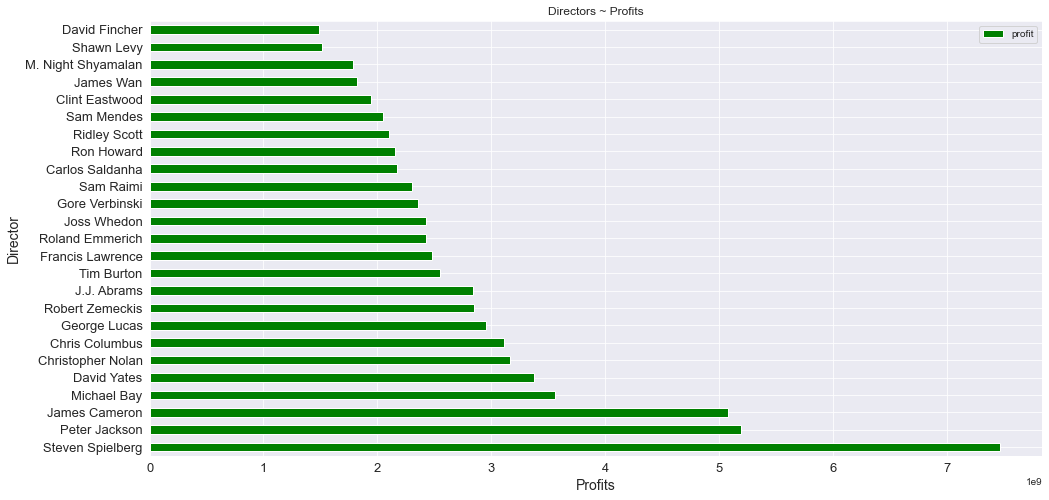

In [ ]:
# Plot a horizontal bar plot to accommodate the directors
df_profit.plot(kind='barh', figsize=(16,8), fontsize=13, color= ['green'])


# Add Labels and titles
plt.title('Directors ~ Profits')
plt.xlabel('Profits',fontsize=14)
plt.ylabel('Director',fontsize=14)
sns.set_style('whitegrid')
plt.show()

From the above, we can conclude that Steven Spielberg has made the highest profits, James Cameron is top 3 in Profits. I will go further to use the profit ratio to determine who has made more money with less films.

## Research Question 2: Who are the Top 10 (of 25) Directors with highest profit ratio

 This is to show the director with the highest profits per film.
    

In [23]:
# Count number of films made by each director
# Create a DataFrame for movie count
df_movie_count = df.groupby('director')['id'].count()
df_movie_count.sort_values(ascending=False)

director
Steven Spielberg                27
Clint Eastwood                  24
Ridley Scott                    21
Woody Allen                     18
Steven Soderbergh               17
                                ..
Jennifer Flackett|Mark Levin     1
Jennifer Chambers Lynch          1
Jennie Livingston                1
Jeffrey Nachmanoff               1
Ã‰mile Gaudreault                1
Name: id, Length: 1713, dtype: int64

Steven Spielberg remains the most prolific director with 27 movies, representing the highest count for any director

In [24]:
# Merge both dataframes - The count and profit dataframes

df_count_profit = pd.merge(pd.DataFrame(df_profit), pd.DataFrame(df_movie_count), on='director', how='inner').reset_index()
df_count_profit.head(1)


,index,director,profit,id
0,0,Steven Spielberg,7467063772,27


In [25]:
#Get the profit_ratio column
#df_profit_ratio = Profit / count(id)

df_count_profit['profit ratio'] = df_count_profit['profit']/df_count_profit['id']
df_count_profit['profit ratio'].head(10)


0    2.765579e+08
1    4.724768e+08
2    6.352494e+08
3    3.233826e+08
4    8.448239e+08
5    3.953186e+08
6    3.462924e+08
7    4.926661e+08
8    1.897794e+08
9    5.678340e+08
Name: profit ratio, dtype: float64

Text(0.5, 0, 'Profit Ratio')

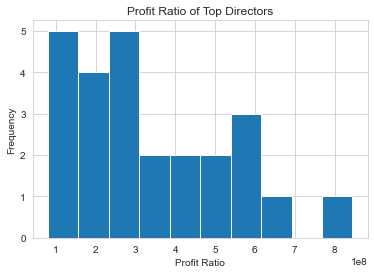

In [ ]:
# Explore the profit Ratio column

df_count_profit['profit ratio'].plot(kind='hist', title='Profit Ratio of Top Directors')
plt.xlabel('Profit Ratio')

From the above, the frequency of directors decreases as the profit ratio increases. Only one director has made above 600 million per film. 

In [ ]:
# Drop 2 columns not neeed for our visualization
df_count_profit.drop(['profit', 'id'], axis=1, inplace=True)


# Call the previously defined top_25 function 

df_count_profit = top_25(df_count_profit, False,25,'profit ratio')


df_count_profit

,director,profit ratio
4,David Yates,8.448239e+08
2,James Cameron,6.352494e+08
13,Joss Whedon,6.060658e+08
9,J.J. Abrams,5.678340e+08
16,Carlos Saldanha,5.423629e+08
7,George Lucas,4.926661e+08
1,Peter Jackson,4.724768e+08
11,Francis Lawrence,4.128299e+08
5,Christopher Nolan,3.953186e+08
6,Chris Columbus,3.462924e+08


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


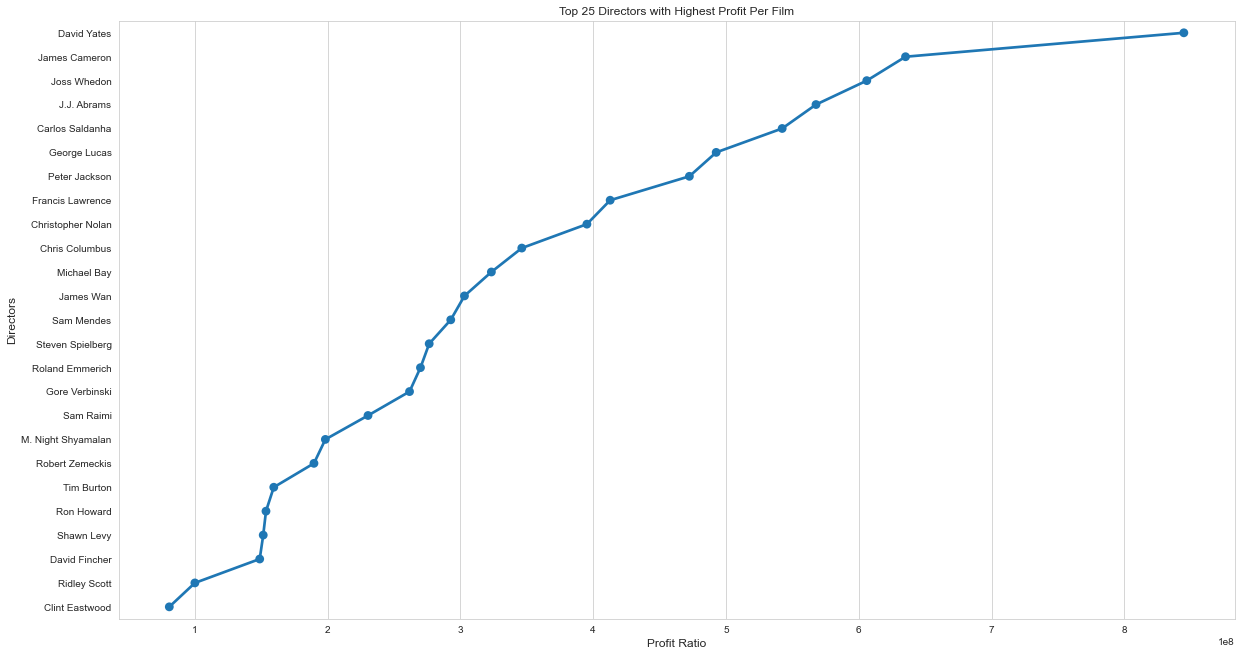

<Figure size 1440x792 with 0 Axes>

In [ ]:
# Plot a  to show the 


# Plot a barh plot

plt.figure(figsize=[20,11])
profit_ratio_plot = sns.pointplot(df_count_profit['profit ratio'], df_count_profit['director'])



# Add Labels and titles

plt.figure(figsize=[20,11])

profit_ratio_plot.set_title('Top 25 Directors with Highest Profit Per Film')

profit_ratio_plot.set_xlabel('Profit Ratio', fontsize = 12)

profit_ratio_plot.set_ylabel('Directors', fontsize = 12)

sns.set_style('darkgrid')

From the above, James Cameron sits top 2 while Steven Spielberg is not even top 10. With Both Visualizations, it is safe to say that number of films influences the profits. Compared to James Cameroon, Steven Spielberg is more prolific, however James has made more money per film. More money per work. 

## Research Question 3: Over the years, whose film has been more popular, James or Steven?

In [ ]:
# Put the release_year into bins 

bins = [1900, 1959, 1969, 1979, 1989,1999, 2009, 2019, np.inf]
names = ['b50s', '60s', '70s', '80s', '90s', '2000s', '2010s', '2020s']

df['year_range'] = pd.cut(df['release_year'], bins, labels=names)


In [ ]:
# Get the popularity mean score for the two directors JC and SS

year_group = df.groupby(['director', 'year_range']).popularity.mean().reset_index()
JC = pd.DataFrame(year_group.query('director == "James Cameron"'))
SS = pd.DataFrame(year_group.query('director == "Steven Spielberg"'))

# James Cameron Doesn't have a score for two year range
# We drop year range 70s and 2010s for steven spielberg

values = ['70s', '2010s']

none = SS.query("year_range in @values")

SS.drop(none.index, inplace=True)




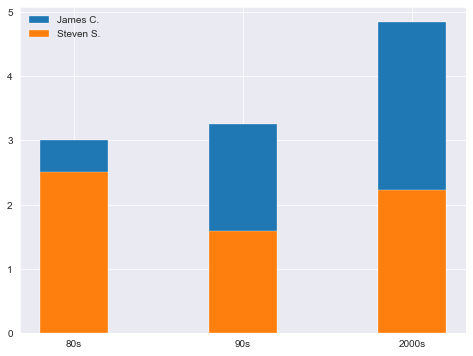

In [ ]:
# Plot to see popularity per year range

fig, ax = plt.subplots(1,1, figsize = (8,6))
plt.style.use("seaborn")
ax.bar(JC['year_range'],JC['popularity'], width=0.4, label='James C.')
ax.bar(SS['year_range'],SS['popularity'], width=0.4, label='Steven S.')
plt.legend()
plt.show()

Due to the fact that 2 other periods were dropped. It is inconclusive to say that there is an inverse relationship between the period and Steven Spielberg Popularity while the opposite is for David cameron, there is a direct relationship between the period and David Cameron Popularity

<a id='conclusions'></a>
## Conclusions

> 1. The number of films influences the profits obviously.
> 2. Steven spielberg is one the greatest director of all time. He also have the numbers to back it up. He is the highest grossing director. 
> 3. However taking a deeper dive into the numbers, the numbers show that he has directed more films than the others. James cameron has a very good success ratio top 2 and also rank top 3 in highest profits. 
> 4. Area of further analysis could be in the  correlation between profits and movie count

## Limitations 
> 1. Majority of datasets were unusable due to the fact that some of the rows in Budget and Revenue columns have Zero as values. Dropping those rows was rational. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Traceback (most recent call last):
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/site-packages/nbconvert/__main__.py", line 2, in <module>
    main()
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "/Users/cwrealestate/opt/anaconda3/lib/python3.9/site-packages/nbconvert/n

1